# Welcome!

# Question 1

What is the difference between pd.read_csv and the with `open(file_to_open, ‘r’)` as this_csv_file (pandas vs non-pandas - when would you use one method vs another)?

In [1]:
# CSV files -- comma-separated values

In [2]:
s = '''abcd,efg,hijk
lm,nopqr,st
uv,wx,yz
'''

with open('mydata.csv', 'w') as outfile:
    outfile.write(s)

In [3]:
!cat mydata.csv

abcd,efg,hijk
lm,nopqr,st
uv,wx,yz


In [4]:
# to read a CSV file into Python, we can (a) open the file normally and (b) use csv.reader to read from it

import csv

with open('mydata.csv', 'r') as infile:
    r = csv.reader(infile)
    for one_record in r:
        print(one_record)
    

['abcd', 'efg', 'hijk']
['lm', 'nopqr', 'st']
['uv', 'wx', 'yz']


In [5]:
import csv

with open('mydata.csv', 'r') as infile:
    r = csv.reader(infile)
    all_records = list(r)   # potentially dangerous -- if you don't know how big the CSV file is
    
all_records    
    

[['abcd', 'efg', 'hijk'], ['lm', 'nopqr', 'st'], ['uv', 'wx', 'yz']]

In [8]:
# the other way to read CSV data is with Pandas

import pandas as pd

pd.read_csv('mydata.csv', header=None)

,0,1,2
0,abcd,efg,hijk
1,lm,nopqr,st
2,uv,wx,yz


In [9]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePathOrBuffer', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=False, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_me

# Question 2

What is the best way to add typings to the code? "core python" and "packages"

In [ ]:
def sum_numbers(*numbers):
    total = 0
    
    for one_number in numbers:
        total += one_number
        
    return total



# Question 3

How does a class work in Python?

Everything in Python is an object. That means that every thing we're working with has its behavior defined based on the type of object is it.  So strings all behave the same way because they're instances of the string class (`str`).  And lists all work the same way because they're all instances of the `list` class.

We can create new classes, and thus new types of standard behavior for a bunch of data structures.

In [10]:
class Person:
    def __init__(self, name):  # this is where attributes are added to our new instance, aka self
        self.name = name
        
    def greet(self):
        return f'Hello, {self.name}!'
    
p1 = Person('Reuven')    
p2 = Person('You')

In [11]:
p1.greet()

'Hello, Reuven!'

In [12]:
p2.greet()

'Hello, You!'

In [13]:
p1.name  # unlike many languages, Python encourages us to read from and write to attributes. 

'Reuven'

In [14]:
p2.name

'You'

# Question 4

Is it possible to save interactive graphs in excel or pdf file? Instead of using pictures.

My interpretation: If I have a graph that I created in Pandas (via matplotlib), and I want to save it so that I can load it elsewhere, how do I do that?

In [15]:
# make sure that plots appear inline
%matplotlib inline


NameError: name 'df' is not defined

In [17]:
import numpy as np
from pandas import Series, DataFrame

In [18]:
df = DataFrame(np.random.randint(0, 100, [5,5]), 
              index=list('abcde'),
              columns=list('vwxyz'))

df

,v,w,x,y,z
a,3,35,10,33,61
b,8,78,85,72,68
c,5,22,21,49,97
d,14,80,39,8,22
e,68,57,30,59,41


<AxesSubplot:>

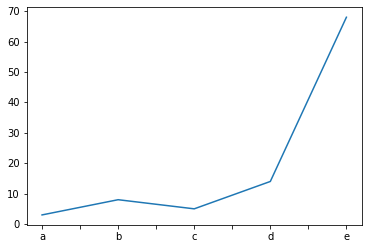

In [19]:
df['v'].plot()

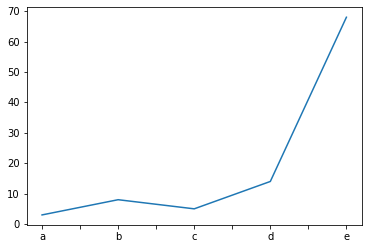

In [20]:
p = df['v'].plot()

In [21]:


type(p)

matplotlib.axes._subplots.AxesSubplot

In [22]:
f = p.get_figure()       # get the figure object

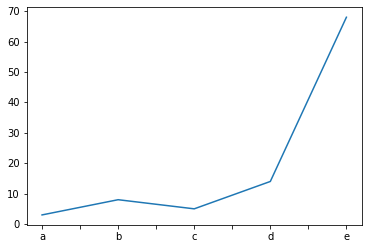

In [23]:
f

In [24]:
f.savefig('myplot.png')  # save the figure to disk -- matplotlib guesses the format from the file extension

In [25]:
!open myplot.png

# Question 5

Is it possible to read the below test input from a file and pass to test?

```python
@pytest.mark.parametrize(
  "userName,Password",
  [
  ('reportuser%2Badmin@gmail.com', 'Atlas@123'),
  ('reportuser%2Badmrunvie@gmail.com', 'Atlas@123'), 
  ('reportuser%2Badmdes@gmail.com', 'Atlas@123'),
  ('reportuser%2Badmvie@gmail.com', 'Atlas@123'), 
  ])

def test_reportingLanding(browser, userName,Password):
```

# Question 6

What is better for parallel processing in python Asyncio or Threading, when is which better?

# threading vs. asyncio

Your computer runs many programs at once. Each is a "process," which pretends to be a separate computer. So each process that runs has access to memory that it pretends is 100% of the computer's memory, and the CPU, which it pretends it has 100% use of.  It doesn't have access to memory from other process.  It can communicate with other processes, but not directly.

The good news with processes is that they're totally independent of one another.  So if you have multiple CPUs/cores, each process can run on a separate core.

This is the most independent, most parallel way to run things.  It also means, in Python, that you need a complete Python copy in each process. That can be inefficient.

Threads are also known as "lightweight processes."  They share a Python process, they share global variables, and they can affect each other -- sometimes very badly!  You have to be very careful when changing data that more than one thread has access to.

*BUT* in Python, only one thread runs at a time. When thread #5 is running, all other threads are waiting for it. Every n ms, a different thread gets to run.  Even if you have many cores, even if you have each thread running on a separate core, only one thread runs at a time.  That's because of the GIL (the global interpreter lock), which restricts only one thread at a time.

So, when should you use threads? When you'll be doing a lot of I/O.  Because threads switch on I/O.  Reading from the network? Use threads. Writing to many files? Use threads.

*BUT BUT BUT* threads are notoriously hard to work with, buggy, annoying, etc.

A few years ago, `asyncio` was introduced into Python.  It is *NOT* running in parallel.  It doesn't claim to.  asyncio is great when you are interacting with things that are really slow compared with your computer.  For example, network clients. Or network servers.

It's far easier to do things with asyncio than it is with threads. But it takes a different way of thinking about things.

So, which should you use?  I'd argue to try asyncio if you're dealing with networks, either as clients or as servers.  But it will take some getting used to, since you'll need to use `async def` and its friends.

GUIs need threads.  

# Question 7

What is the best IDE for Python?

The right answer: Whatever makes you happiest and most productive.

Python doesn't care!

I use Emacs, because I'm an old dinosaur.  (Editor used by Middle Aged Computer Scientists.)

Very popular and powerful:

- PyCharm
- VSCode

The most important thing is that you get an IDE that knows how to work with Python. 

Other ones I've heard people are happy using:

- Eclipse
- vim
- Sublime Text
- Spyder

You should try a bunch of them until you find something you like.

# Question 8

Can we use Pandas for reading XML files?

In [26]:
pd.read_xml('profiles_settings.xml')

,option,version
0,NaN,NaN


# Question 9

what is the best way to reorder columns in dataframe, when dealing big dataframe?

I don't remember, but I think that Kevin Markham has a tip about this on his "Pandas tips" GitHub repo / YouTube channel.

In [30]:
df = pd.read_csv('/etc/passwd', sep=':', comment='#', header=None,
                names=['username', 'passwd', 'uid', 'gid', 'name','homedir', 'shell'])

In [31]:
df

,username,passwd,uid,gid,name,homedir,shell
0,nobody,*,-2,-2,Unprivileged User,/var/empty,/usr/bin/false
1,root,*,0,0,System Administrator,/var/root,/bin/sh
2,daemon,*,1,1,System Services,/var/root,/usr/bin/false
3,_uucp,*,4,4,Unix to Unix Copy Protocol,/var/spool/uucp,/usr/sbin/uucico
4,_taskgated,*,13,13,Task Gate Daemon,/var/empty,/usr/bin/false
...,...,...,...,...,...,...,...
105,_fud,*,278,278,Firmware Update Daemon,/var/db/fud,/usr/bin/false
106,_knowledgegraphd,*,279,279,Knowledge Graph Daemon,/var/db/knowledgegraphd,/usr/bin/false
107,_coreml,*,280,280,CoreML Services,/var/empty,/usr/bin/false
108,_trustd,*,282,282,trustd,/var/empty,/usr/bin/false


In [32]:
# how can I reorder the columns?

df.reindex(columns=['username', 'passwd', 'uid', 'gid', 'name','homedir', 'shell'][::-1])

,shell,homedir,name,gid,uid,passwd,username
0,/usr/bin/false,/var/empty,Unprivileged User,-2,-2,*,nobody
1,/bin/sh,/var/root,System Administrator,0,0,*,root
2,/usr/bin/false,/var/root,System Services,1,1,*,daemon
3,/usr/sbin/uucico,/var/spool/uucp,Unix to Unix Copy Protocol,4,4,*,_uucp
4,/usr/bin/false,/var/empty,Task Gate Daemon,13,13,*,_taskgated
...,...,...,...,...,...,...,...
105,/usr/bin/false,/var/db/fud,Firmware Update Daemon,278,278,*,_fud
106,/usr/bin/false,/var/db/knowledgegraphd,Knowledge Graph Daemon,279,279,*,_knowledgegraphd
107,/usr/bin/false,/var/empty,CoreML Services,280,280,*,_coreml
108,/usr/bin/false,/var/empty,trustd,282,282,*,_trustd


In [33]:
df

,username,passwd,uid,gid,name,homedir,shell
0,nobody,*,-2,-2,Unprivileged User,/var/empty,/usr/bin/false
1,root,*,0,0,System Administrator,/var/root,/bin/sh
2,daemon,*,1,1,System Services,/var/root,/usr/bin/false
3,_uucp,*,4,4,Unix to Unix Copy Protocol,/var/spool/uucp,/usr/sbin/uucico
4,_taskgated,*,13,13,Task Gate Daemon,/var/empty,/usr/bin/false
...,...,...,...,...,...,...,...
105,_fud,*,278,278,Firmware Update Daemon,/var/db/fud,/usr/bin/false
106,_knowledgegraphd,*,279,279,Knowledge Graph Daemon,/var/db/knowledgegraphd,/usr/bin/false
107,_coreml,*,280,280,CoreML Services,/var/empty,/usr/bin/false
108,_trustd,*,282,282,trustd,/var/empty,/usr/bin/false


# Question 10

not sure if appropriate... but how do you create an executable (.exe) file off a python script? not sure if asking correct way either.

Answer: pyinstaller.  Which I have used very rarely, but does this.

# Question 11

why are packages like unittest needed to test Python code? can't you test functions in the script itself and then for error handling, you'll have if else and try except statements?

In [ ]:
def add(x, y):
    return x + y

# I could put all sorts of checks in my program

def add(x, y):
    if not instance(x, int):
        raise TypeError('Bad x!')
    if not instance(y, int):
        raise TypeError('Bad y!')
    
    return x + y


# Question 12

is it possible to easily "host" a jupyter notebook so that you can share a live dashboard or something with a team?

Yes! And I have a blog post about it:  https://lerner.co.il/2017/02/01/five-minute-guide-setting-jupyter-notebook-server/